# Problem Statement

No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business. Due to new players in the market, telecom industry has become very competitive and retaining customers becoming a challenge. In spite of No-Churn initiatives of reducing tariffs and promoting more offers, the churn rate ( percentage of customers migrating to competitors) is well above 10%. No-Churn wants to explore possibility of Machine Learning to help with following use cases to retain competitive edge in the industry

###### Business Objectives:
* Identifying the key cause of the customer churn
* Provide steps to retain the valuable customer

## Domain Analysis

The dataset comprises of a total of 21 columns and 4617 rows

1. State - which stare does the account belong to in USA
2. Account Length(Ac_len)- No. of days the customer has been with the dedicated brand
3. Area Code(Ar_code) - refers to the area they reside
4. Phone - the customer's unique identifier number
5. International Plan(IPlan) - if the customer has international plan or not 
6. VMail Plan(VMail_Plan)- if the customer has voice mail plan 
7. VMail Message(VMail_Mes) - customer voice mail inbox messages 
8. Day Mins(DMins)- how many day times minutes the customer has attended
9. Day Calls(DCalls) - no. of calls the customer made in a day
10. Day Charge(DCharge) - the total expense incured by day usage
11. Eve Mins(EMins)- how many evening times in minutes the customer has attended
12. Eve Calls(ECalls)- no. of calls the customer made in an evening
13. Eve Charge(ECharge) - the total expense incured by evening usage
14. Night Mins(NMins) - how many night times in minutes the customer has attended
15. Night Calls(NCalls) - no. of calls the customer made in a night
16. Night Charge(NCharge) - the total expense incured by might usage
17. International mins(IMins) - how many international times in minutes the customer has attended
18. International call(ICalls) - no. of calls international calls the customer made
19. International charge(ICharge)- the total expense incured by international usage
20. CustServ Calls(CSCall) - calls made to the customer service 
21. Churn - True or False flag

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import mysql.connector

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [3]:
#making connection DB server
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team3',
                                  password='********',
                                  database='project_telecom')

In [4]:
pd.read_sql_query('show tables',connection)

,Tables_in_project_telecom
0,telecom_churn_data


In [5]:
data=pd.read_sql_query('select * from telecom_churn_data',connection)

In [6]:
data

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [7]:
data.columns=['State','Ac_len','Ar_Code','Phone','IPlan','VMail_Plan','VMail_Mes','DMins','DCalls','DCharge','EMins','ECalls','ECharge','NMins','NCalls','NCharge','IMins','Icalls','ICharge','CSCalls','Churn']

In [8]:
data.head()

,State,Ac_len,Ar_Code,Phone,IPlan,VMail_Plan,VMail_Mes,DMins,DCalls,DCharge,...,ECalls,ECharge,NMins,NCalls,NCharge,IMins,Icalls,ICharge,CSCalls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Basic checks

In [9]:
data.shape

(4617, 21)

In [10]:
data.columns

Index(['State', 'Ac_len', 'Ar_Code', 'Phone', 'IPlan', 'VMail_Plan',
       'VMail_Mes', 'DMins', 'DCalls', 'DCharge', 'EMins', 'ECalls', 'ECharge',
       'NMins', 'NCalls', 'NCharge', 'IMins', 'Icalls', 'ICharge', 'CSCalls',
       'Churn'],
      dtype='object')

In [11]:
data.tail()

,State,Ac_len,Ar_Code,Phone,IPlan,VMail_Plan,VMail_Mes,DMins,DCalls,DCharge,...,ECalls,ECharge,NMins,NCalls,NCharge,IMins,Icalls,ICharge,CSCalls,Churn
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       4617 non-null   object
 1   Ac_len      4617 non-null   object
 2   Ar_Code     4617 non-null   object
 3   Phone       4617 non-null   object
 4   IPlan       4617 non-null   object
 5   VMail_Plan  4617 non-null   object
 6   VMail_Mes   4617 non-null   object
 7   DMins       4617 non-null   object
 8   DCalls      4617 non-null   object
 9   DCharge     4617 non-null   object
 10  EMins       4617 non-null   object
 11  ECalls      4617 non-null   object
 12  ECharge     4617 non-null   object
 13  NMins       4617 non-null   object
 14  NCalls      4617 non-null   object
 15  NCharge     4617 non-null   object
 16  IMins       4617 non-null   object
 17  Icalls      4617 non-null   object
 18  ICharge     4617 non-null   object
 19  CSCalls     4617 non-null   object
 20  Churn   

In [13]:
#Typecasting
data['Ac_len']=data.Ac_len.astype('int')
#data['Ar_Code']=data.Ar_Code.astype('int')
data['VMail_Mes']=data.VMail_Mes.astype('int')
data['DMins']=data.DMins.astype('float')
data['DCalls']=data.DCalls.astype('int')
data['DCharge']=data.DCharge.astype('float')
data['EMins']=data.EMins.astype('float')
data['ECalls']=data.ECalls.astype('int')
data['ECharge']=data.ECharge.astype('float')
data['NMins']=data.NMins.astype('float')
data['NCalls']=data.NCalls.astype('int')
data['NCharge']=data.NCharge.astype('float')
data['IMins']=data.IMins.astype('float')
data['Icalls']=data.Icalls.astype('int')
data['ICharge']=data.ICharge.astype('float')
data['CSCalls']=data.CSCalls.astype('int')
#data['Churn']=data['Churn'].astype('')

In [14]:
# Remove leading spaces and convert 'Churn' column to boolean
data['Churn']=data['Churn'].str.strip().replace({'False.': False, 'True.': True}).astype(bool)


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       4617 non-null   object 
 1   Ac_len      4617 non-null   int32  
 2   Ar_Code     4617 non-null   object 
 3   Phone       4617 non-null   object 
 4   IPlan       4617 non-null   object 
 5   VMail_Plan  4617 non-null   object 
 6   VMail_Mes   4617 non-null   int32  
 7   DMins       4617 non-null   float64
 8   DCalls      4617 non-null   int32  
 9   DCharge     4617 non-null   float64
 10  EMins       4617 non-null   float64
 11  ECalls      4617 non-null   int32  
 12  ECharge     4617 non-null   float64
 13  NMins       4617 non-null   float64
 14  NCalls      4617 non-null   int32  
 15  NCharge     4617 non-null   float64
 16  IMins       4617 non-null   float64
 17  Icalls      4617 non-null   int32  
 18  ICharge     4617 non-null   float64
 19  CSCalls     4617 non-null  

* No Null values

In [16]:
data.describe()

,Ac_len,VMail_Mes,DMins,DCalls,DCharge,EMins,ECalls,ECharge,NMins,NCalls,NCharge,IMins,Icalls,ICharge,CSCalls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
data.describe(include='O')

,State,Ar_Code,Phone,IPlan,VMail_Plan
count,4617,4617,4617,4617,4617
unique,51,3,4617,2,2
top,WV,415,382-4657,no,no
freq,149,2299,1,4171,3381


* phone feature is unique one,so we can drop it

In [18]:
data.drop(['Phone'],axis=1,inplace=True)

In [19]:
data.nunique()

State           51
Ac_len         218
Ar_Code          3
IPlan            2
VMail_Plan       2
VMail_Mes       47
DMins         1901
DCalls         123
DCharge       1901
EMins         1833
ECalls         125
ECharge       1621
NMins         1813
NCalls         130
NCharge       1012
IMins          168
Icalls          21
ICharge        168
CSCalls         10
Churn            2
dtype: int64

In [20]:
num_col=data.select_dtypes(['int','float'])
num_col

,Ac_len,VMail_Mes,DMins,DCalls,DCharge,EMins,ECalls,ECharge,NMins,NCalls,NCharge,IMins,Icalls,ICharge,CSCalls
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,57,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3
4613,177,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3
4614,67,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1
4615,98,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0


In [21]:
cat_col=data.select_dtypes(['object','bool'])
cat_col

,State,Ar_Code,IPlan,VMail_Plan,Churn
0,KS,415,no,yes,False
1,OH,415,no,yes,False
2,NJ,415,no,no,False
3,OH,408,yes,no,False
4,OK,415,yes,no,False
...,...,...,...,...,...
4612,NY,510,no,yes,False
4613,NM,408,no,yes,False
4614,VT,408,no,yes,False
4615,MI,415,no,yes,False


## Exploratory Data Analysis

##### Univariate

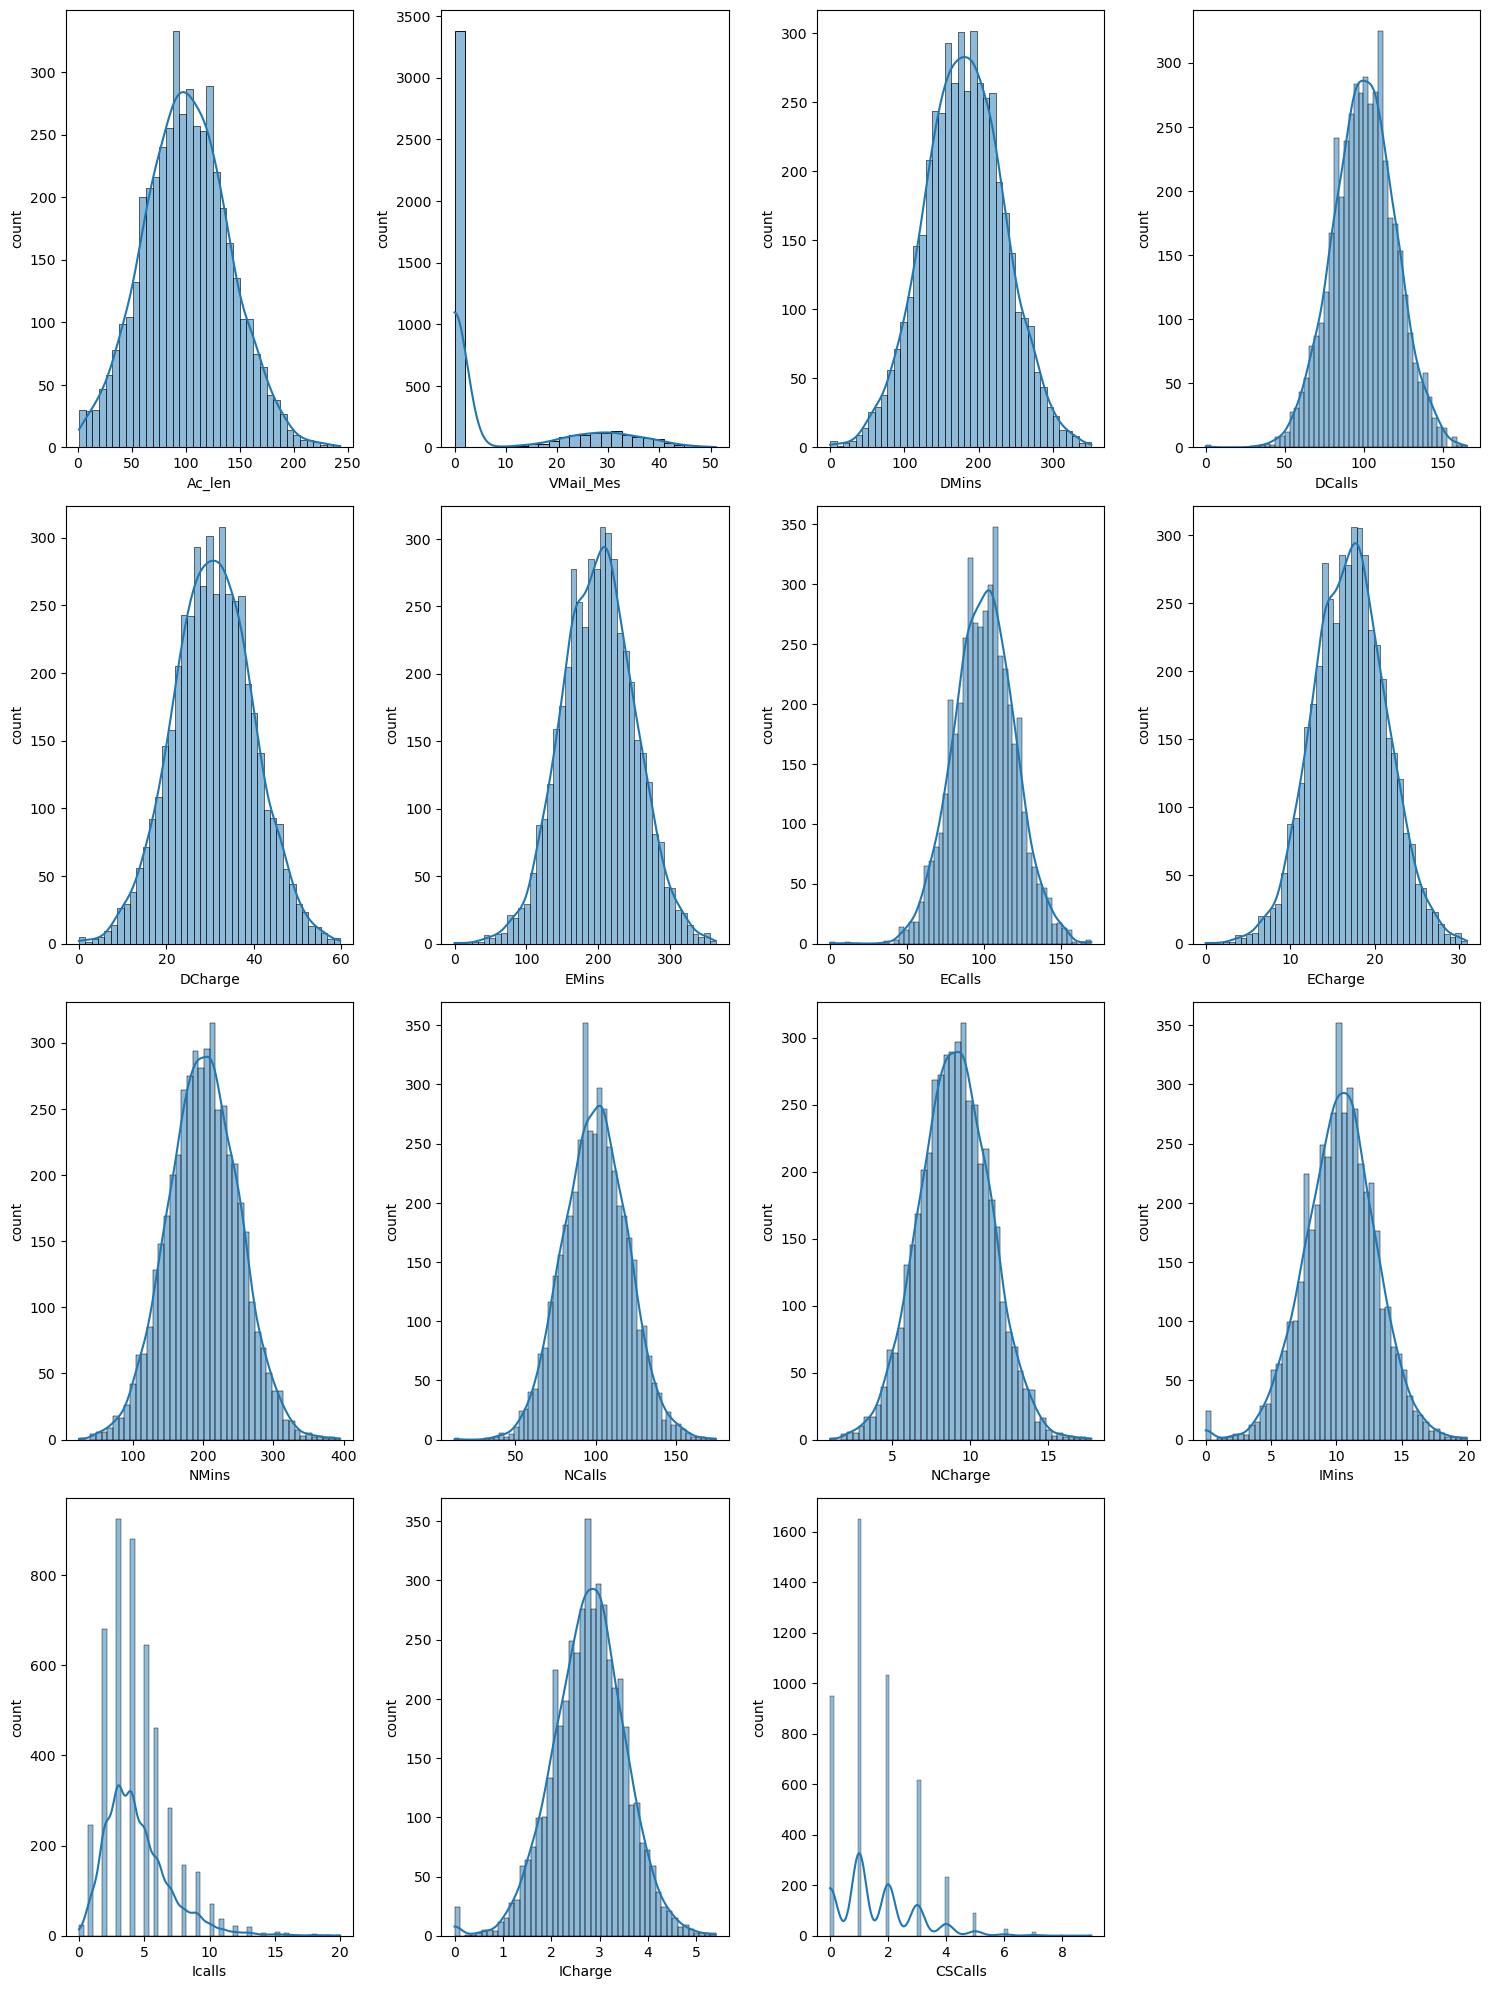

In [22]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.histplot(x=num_col[column],kde=True)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

##### Insight

* Most of the numerical data are normaly destributed

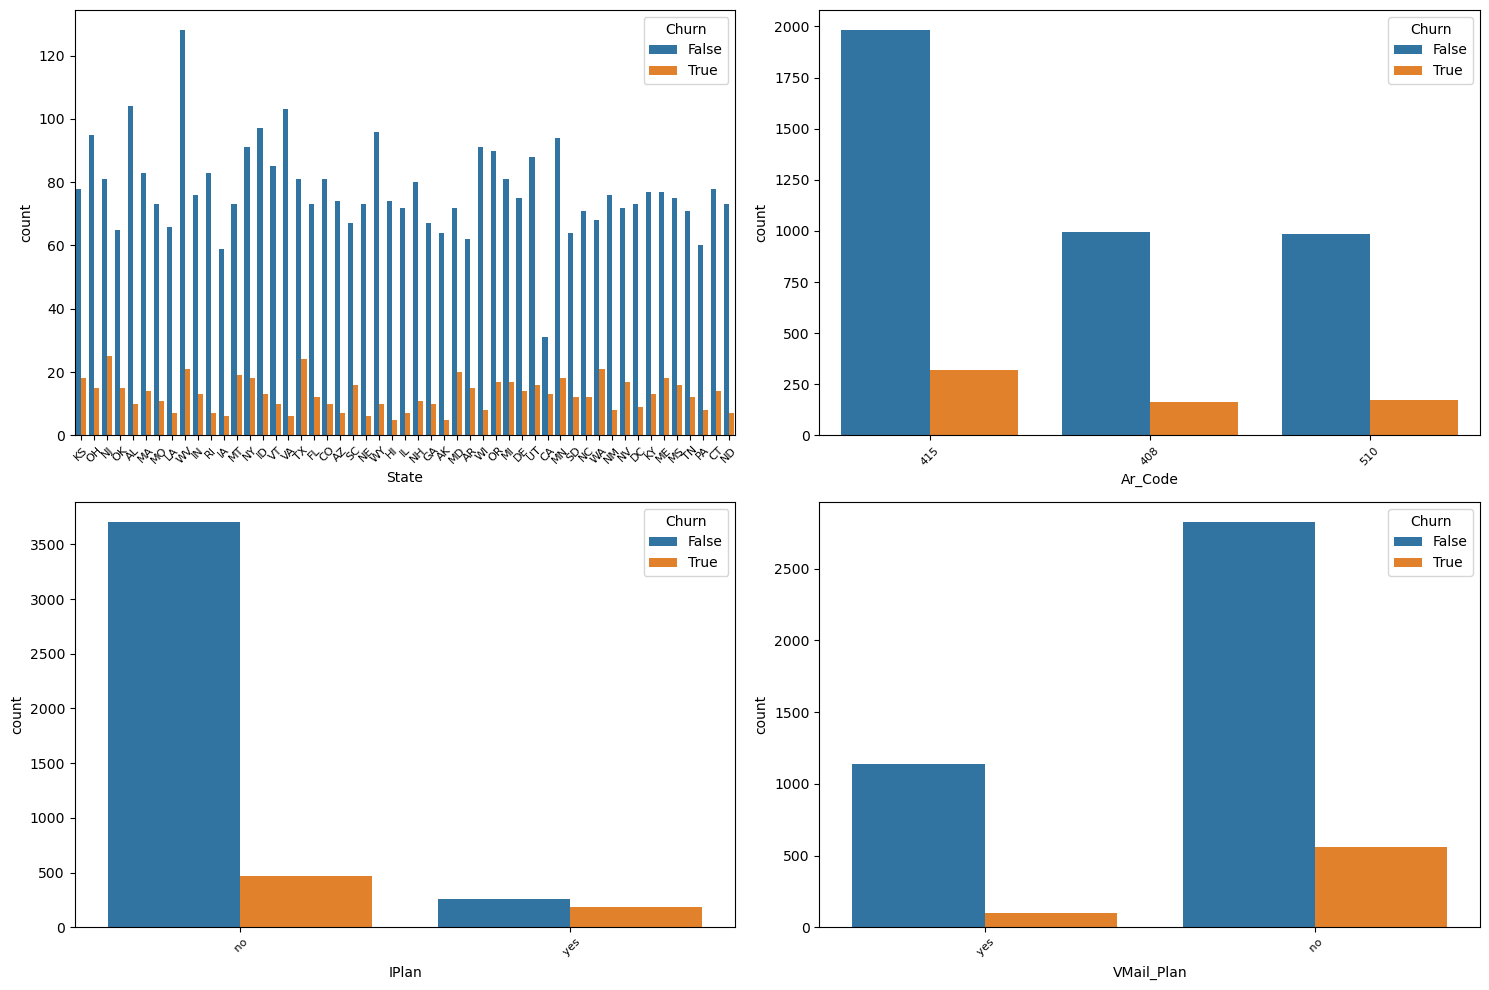

In [23]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in cat_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.countplot(data=cat_col,x=cat_col[column],hue='Churn')
        plt.xlabel(column)
        plt.xticks(rotation=45,fontsize=8)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()

##### Insight

* The state WV has more number of customers where as CA has least number of customer
* International plan is used by less than 500 people
* VMail_plan used by more than 1200 people but it is less
* More than 700 customers migrated to other plan
* The people who has less VMail plan usually migrating
* The most of the migrating people uses IPlan

In [24]:
#Finding howmany percentage of destribution of churn customers
data['Churn'].value_counts()/len(data)*100

False    85.79164
True     14.20836
Name: Churn, dtype: float64

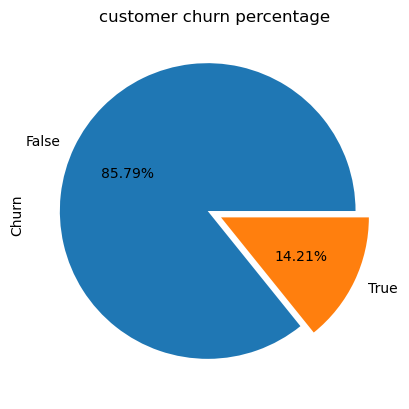

In [25]:
data['Churn'].value_counts().plot.pie(autopct='%1.2f%%',explode=[0.05,0.05],)
plt.title('customer churn percentage')
plt.show()

###### Insights

* Showing 14% customers are churning,85%are non churning customer
* here data is Imbalanced
* 14.5% customers are churned which might look like a small number, but once upon a time the 14.5% was 1.45% which has grown upto 14.5%. So, immediate action should be taken.

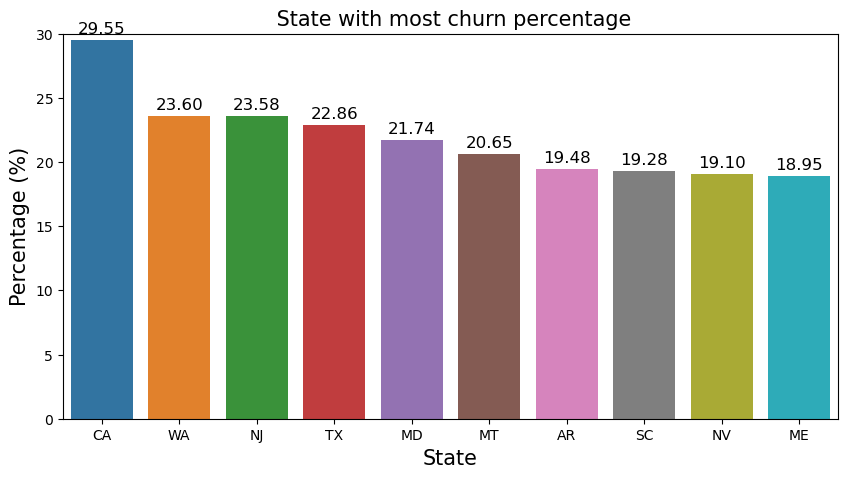

In [26]:
# Chart - 3  State vs. average true churn percentage visualization code

# Vizualizing top 10 churned state
plt.figure(figsize=(10,5))
bar1 = ((data.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = False).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" State with most churn percentage", fontsize = 15)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of the y axis from 0 to 30
plt.ylim(0,30)
plt.show()

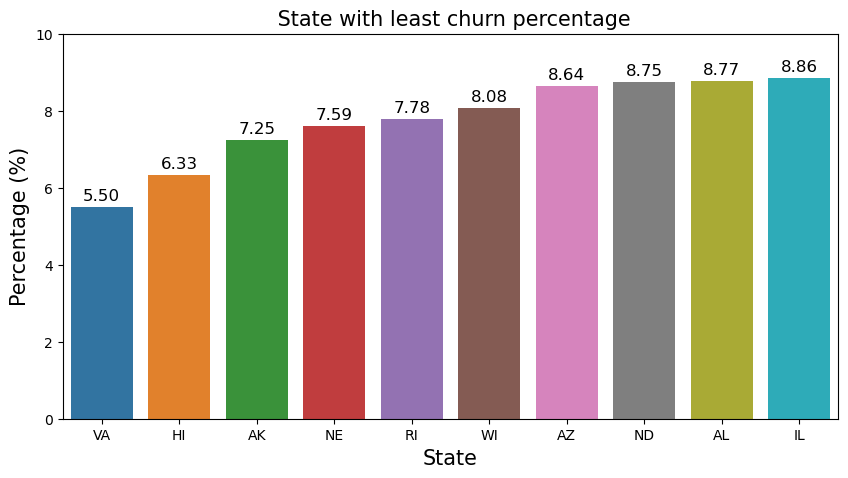

In [27]:
# Vizualizing bottom 10 churned state
plt.figure(figsize=(10,5))
bar1 = ((data.groupby(['State'])['Churn'].mean()*100).sort_values(ascending = True).reset_index(name="Average True Churn ").head(10))
plots = sns.barplot(data = bar1, x = 'State', y="Average True Churn ")
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" State with least churn percentage", fontsize = 15)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Percentage (%)', fontsize = 15)
# Setting limit of y axis from 0 to 10
plt.ylim(0,10)
plt.show()

### Insights

There are 51 states having different churn rates .

**CA, NJ ,TX , MD ,SC ,MI, MS, NV, WA, ME**  are the ones who have higher churn rate more than 20% which is more than 50% of average churn rate.

And **HI, AK, AZ, VA, IA, LA, NE, IL, WI, RI** are the ones who have lower churn rate which is less than 10%.

Yes, the data of state wise churning depicts that there are lot of states who are having average churn rate more than 20 % which needs to be studied and look for further analysis to decide which factor are causing the churn.

Churn
False    31
True      4
dtype: int64
 


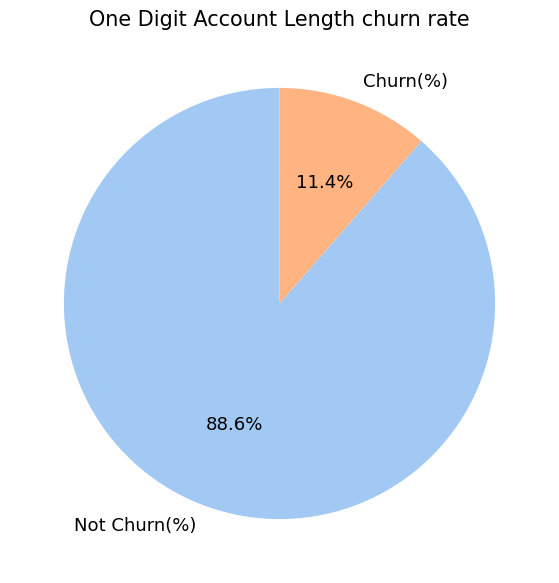

In [28]:
# Account Length VS Churn Percentage
# One Digit Account Length
one_length = data[data['Ac_len']<=9].loc[:,['Churn']].value_counts()
print(one_length)
print(" ")

# Visualizing One Digit Account Length Based on Churn percentage
#color palette selection
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(10,7))
# plotting pie chart
plt.pie(one_length, labels=['Not Churn(%)','Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%",textprops = textprops)
plt.title('One Digit Account Length churn rate', fontsize=15)
plt.show()

Churn
False    1935
True      301
dtype: int64
 


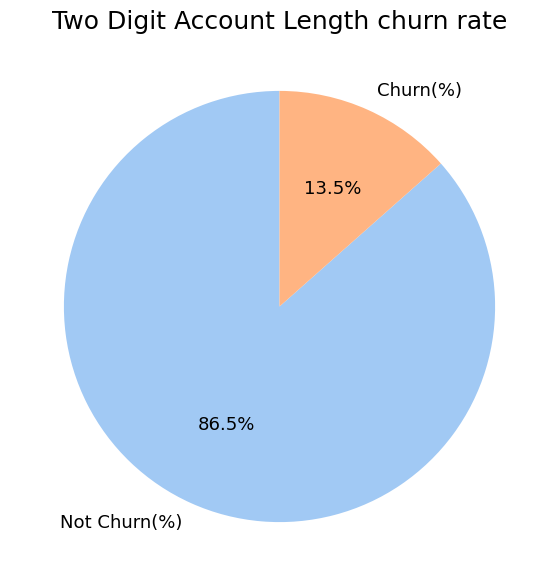

In [29]:
# Two Digit Account Length
two_account=data[(data['Ac_len']<=99) & (data['Ac_len']>=10)].loc[:,['Churn']].value_counts()
print(two_account)
print(" ")
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(15,7))
# plotting pie chart
plt.pie(two_account, labels=['Not Churn(%)','Churn(%)'], startangle=90, colors=colors, autopct="%1.1f%%", textprops = textprops)
plt.title('Two Digit Account Length churn rate', fontsize=18)
plt.show()

Churn
False    1995
True      351
dtype: int64
 


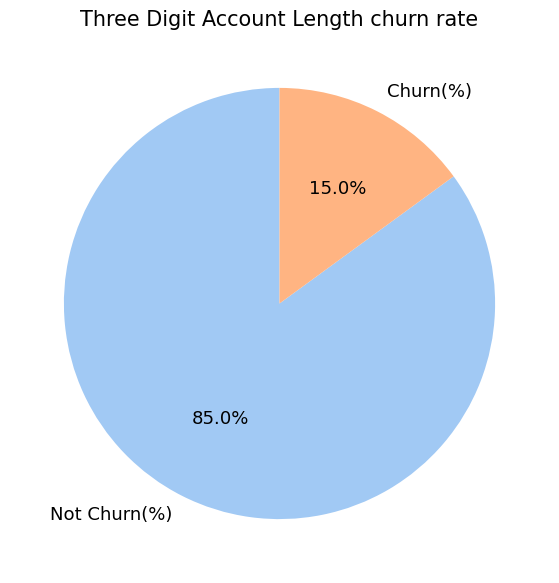

In [30]:
# Three Digit Account Length
three_account=data[(data['Ac_len']<=data['Ac_len'].max()) & (data['Ac_len']>=100)].loc[:,['Churn']].value_counts()
print(three_account)
print(" ")
colors = sns.color_palette('pastel')[0:7]
textprops = {'fontsize':13}

plt.figure(figsize=(10,7))
# plotting data on chart using seaborn
plt.pie(three_account, labels=['Not Churn(%)','Churn(%)'],startangle=90 , colors=colors, autopct="%1.1f%%",textprops = textprops)
plt.title('Three Digit Account Length churn rate', fontsize=15)
plt.show()

###### Insights
* Account length is the no. of days the customers are active. So for the new customers those churning rate is too low around 8.3% in percentage and number is 2. They might be just using the telecom service to experience the benefits and they might not be satisfied with the service provided and churned.

* Those people whose account length are between 10 to 99 are having a churning rate of 14%. The customers below 50 might be treated as new customers and more than 55 and less than 99 they might not be geting benefits from plan taken.

* Those people whose account length is more than 100 are like old customers and they might be churning due to no additional offers given to them like power plus plan or other benefits.

* So, yes Account Length is also depicting a clear view of churing reasons and insights.

In [31]:
# data for international plan
inter_plan = data['IPlan'].value_counts()/len(data)*100
print(inter_plan)

 no     90.340048
 yes     9.659952
Name: IPlan, dtype: float64


* 90% people have no International plan,approximately 10% people using IPlan

In [32]:
 data.groupby('IPlan')['Churn'].value_counts()/len(data)*100

IPlan  Churn
 no    False    80.160277
       True     10.179770
 yes   False     5.631362
       True      4.028590
Name: Churn, dtype: float64

In [33]:
# Assigning values for furthur charts
i1 = data['IPlan'].unique()
i2 = data.groupby('IPlan')['Churn'].mean()*100
i3 = data.groupby(['IPlan'])['ICharge'].mean()
i4 = data.groupby(["Churn"])['IMins'].mean()

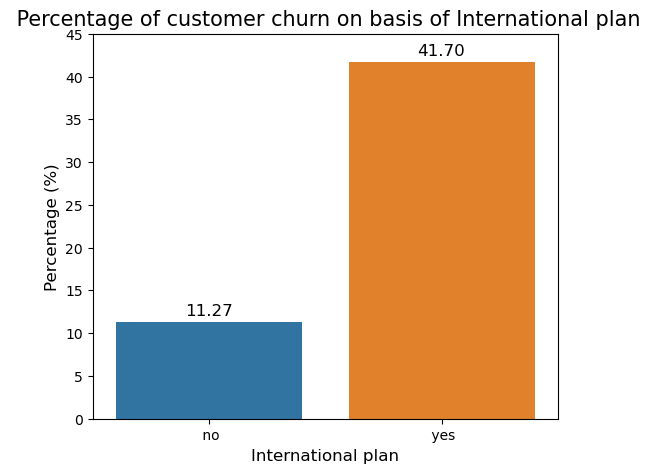

In [34]:
# Visualizing code for people churning percentage having international plan
plt.figure(figsize=(6,5))
plots = sns.barplot(x=i1,y=i2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of International plan", fontsize = 15)
plt.xlabel('International plan', fontsize = 12)
plt.ylabel('Percentage (%)', fontsize = 12)
plt.ylim(0,45)
plt.show()

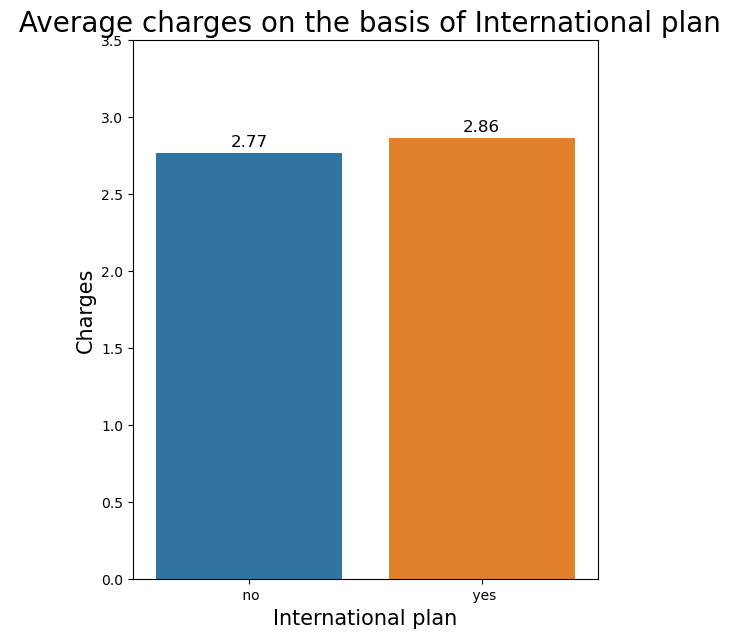

In [35]:
# Visualizing code for average calling charge of customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i3)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average charges on the basis of International plan", fontsize = 20)
plt.xlabel('International plan', fontsize = 15)
plt.ylabel('Charges', fontsize = 15)
plt.ylim(0,3.5)
plt.show()

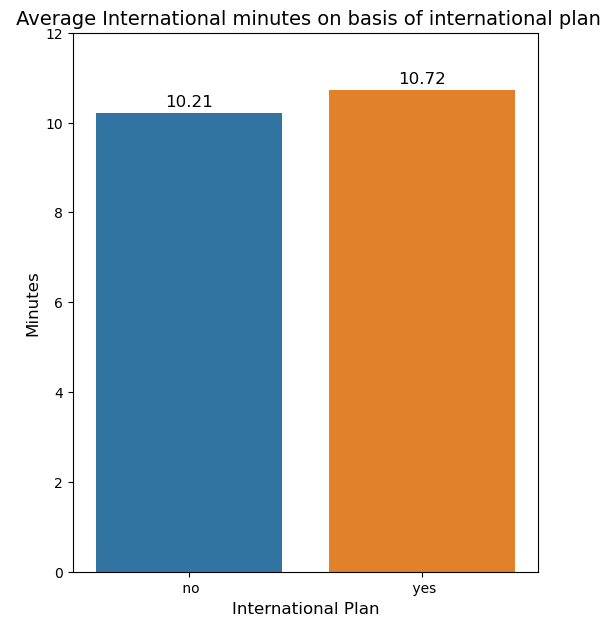

In [36]:
# Visualizing code for average minutes talked by customers having international plan
plt.figure(figsize=(6,7))
plots = sns.barplot(x=i1,y=i4)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title(" Average International minutes on basis of international plan", fontsize = 14)
plt.xlabel('International Plan', fontsize = 12)
plt.ylabel('Minutes', fontsize = 12)
plt.ylim(0,12)
plt.show()

### Insights

* Among those who have an international plan, 42.4 % people churn.

* Whereas among those who dont have an international plan, only 11.4 % people churn.

* Among those who  have a international plan their average charge is 2.87 and they talk for 10.7 minutes on an average.

* Whereas among those who dont have a international plan their average charge is 2.75 and they talk for 10.16 minutes on an average.

* The reason why people having international plan might be leaving is that they are paying same amount of money for international calls as for those customers who dont have a international plan. Hence they arent getting any benefits for having an international plan so they might be unhappy.

Those people who have international plan they are paying some additional charges to get the plan but the talk time value charge is same as those customers having no international plan. That might be great reason for more churns for those having international plan.

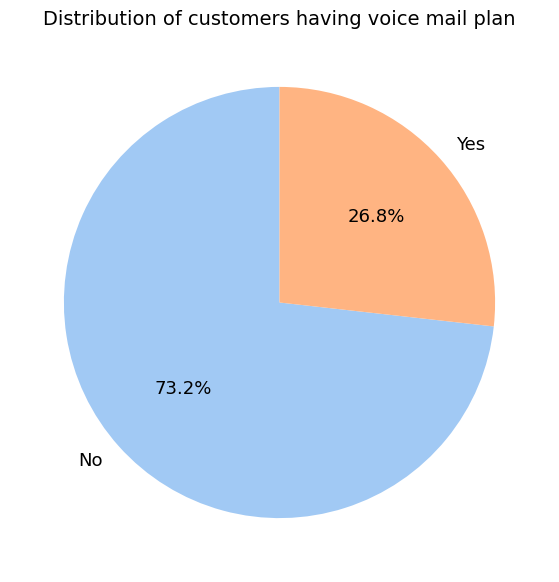

In [37]:
# Chart - 6 visualization code

voice = data['VMail_Plan'].value_counts()

#color palette selection
palette_color = sns.color_palette('pastel')
textprops = {'fontsize':13}

# plotting chart of voice mail
plt.figure(figsize=(9,7))
plt.pie(voice, labels=['No','Yes'],startangle=90 , colors=palette_color, autopct="%1.1f%%",textprops = textprops)
plt.title('Distribution of customers having voice mail plan', fontsize=14)
plt.show()

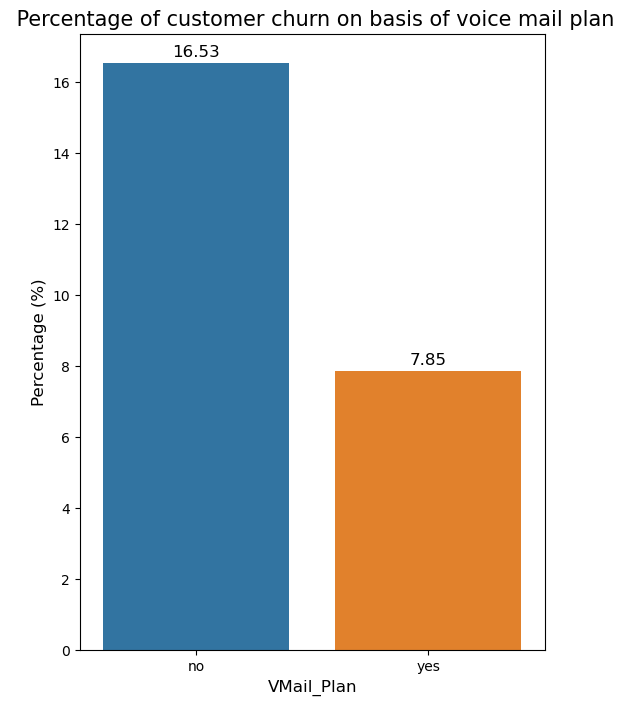

In [38]:
# Vizualizing code for customers churning while having voice mail plan

cc1=list(['no','yes'])
cc2=data.groupby('VMail_Plan')['Churn'].mean()*100

plt.figure(figsize=(6,8))
plots = sns.barplot(x=cc1,y=cc2)
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

plt.title(" Percentage of customer churn on basis of voice mail plan", fontsize = 15)
plt.xlabel('VMail_Plan', fontsize = 12)
plt.ylabel('Percentage (%)', fontsize = 12)
plt.show()

###### Insights 

* 73% dont have a voice mail plan,where as 27% have a voice mail plan

* Among those who dont have a voice mail 16.7 % people churn.

* Whereas among those who have a voice mail plan only 8.7 % people churn.


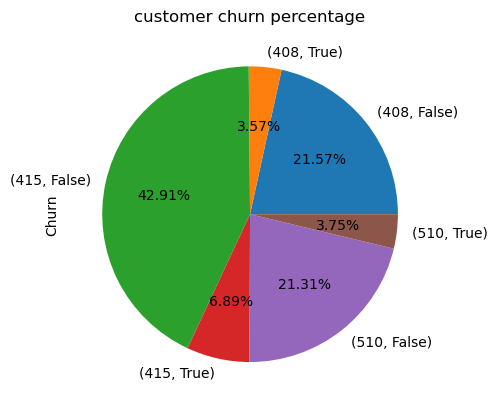

In [39]:
# Areacode VS Churn
(data.groupby('Ar_Code')['Churn'].value_counts()/len(data)*100).plot.pie(autopct='%1.2f%%',)
plt.title('customer churn percentage')
plt.show()

###### Insight
* More number of people are from area code 415
* Three area code have same churning rate,since no impact on Area code

In [40]:

# Average of total day calls, total day minutes & total day charge of churn
cn_dcalls = pd.DataFrame(data.groupby(["Churn"])['DCalls'].mean())
print(cn_dcalls)
print('')
cn_dm = pd.DataFrame(data.groupby(["Churn"])['DMins'].mean())
print(cn_dm)
print('')
cn_dc = pd.DataFrame(data.groupby(["Churn"])['DCharge'].mean())
print(cn_dc)

           DCalls
Churn            
False   99.922747
True   100.849085

            DMins
Churn            
False  176.000252
True   207.298018

         DCharge
Churn           
False  29.920624
True   35.241098


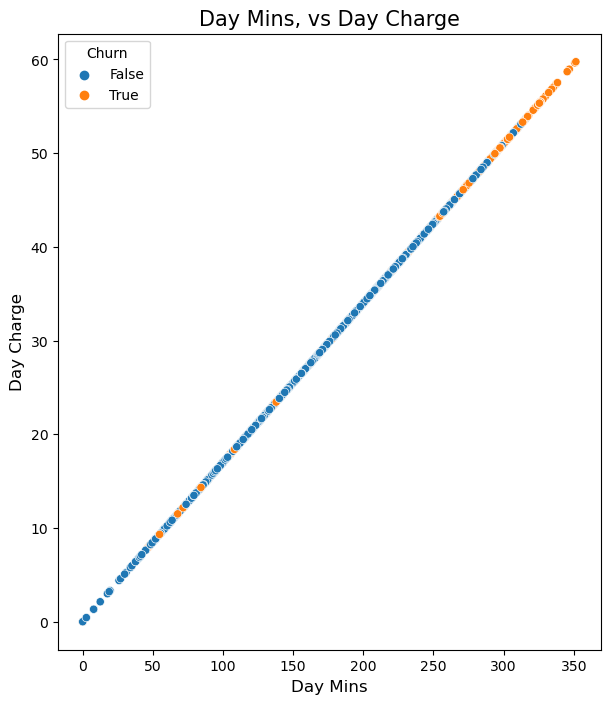

In [41]:
# Vizualizing Total day minutes vs total day charge
plt.figure(figsize=(7,8))
sns.scatterplot(data=data, x="DMins", y="DCharge", hue="Churn")
plt.title('Day Mins, vs Day Charge', fontsize=15)
plt.xlabel('Day Mins',fontsize = 12)
plt.ylabel('Day Charge',fontsize = 12)
plt.show()

In [42]:
# Average of total eve calls, total eve minutes & total evening charge of churn
cn_ecalls = pd.DataFrame(data.groupby(["Churn"])['ECalls'].mean())
print(cn_ecalls)
print(" ")
cn_em = pd.DataFrame(data.groupby(["Churn"])['EMins'].mean())
print(cn_em)
print(" ")
cn_ec = pd.DataFrame(data.groupby(["Churn"])['ECharge'].mean())
print(cn_ec)

          ECalls
Churn           
False  100.16410
True   100.27439
 
            EMins
Churn            
False  198.638425
True   211.241311
 
         ECharge
Churn           
False  16.884509
True   17.955671


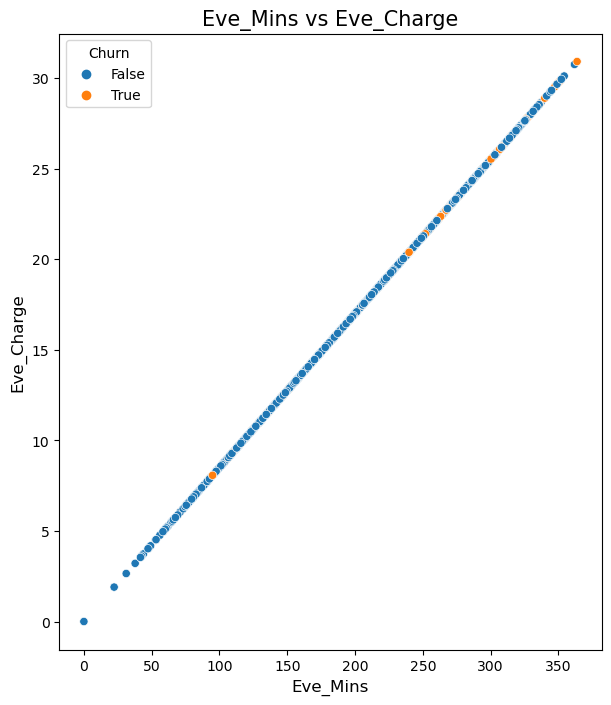

In [43]:
# Vizualizing total evening minutes vs total evening charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="EMins", y="ECharge", hue="Churn", data=data)
plt.title('Eve_Mins vs Eve_Charge', fontsize=15)
plt.xlabel('Eve_Mins',fontsize = 12)
plt.ylabel('Eve_Charge',fontsize = 12)
plt.show()

In [44]:
# Average of total night calls, total night minutes & total night charge of churn
cn_ncalls = pd.DataFrame(data.groupby(["Churn"])['NCalls'].mean())
print(cn_ncalls)
print(" ")
cn_nm = pd.DataFrame(data.groupby(["Churn"])['NMins'].mean())
print(cn_nm)
print(" ")
cn_nc = pd.DataFrame(data.groupby(["Churn"])['NCharge'].mean())
print(cn_nc)

          NCalls
Churn           
False  99.998233
True   99.617378
 
            NMins
Churn            
False  199.734158
True   205.996494
 
        NCharge
Churn          
False  8.988147
True   9.269939


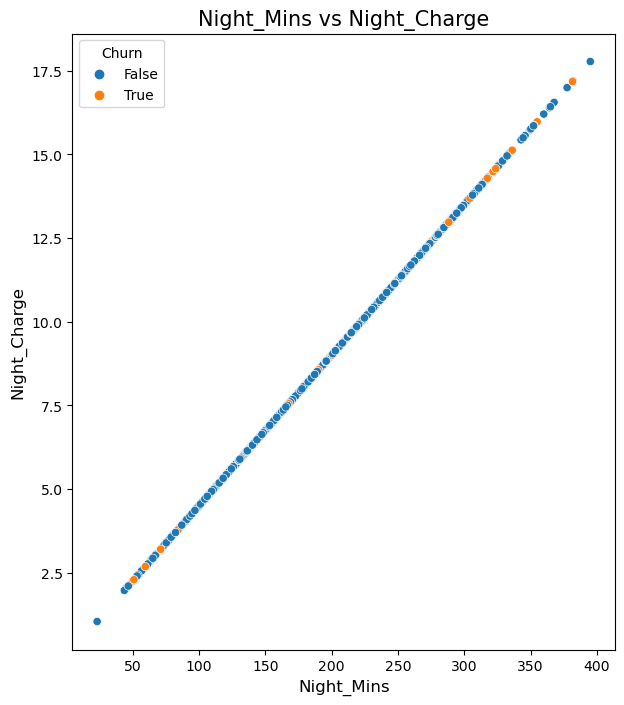

In [45]:
# Vizualizing Total night minutes vs total night charge
plt.figure(figsize=(7,8))
sns.scatterplot(x="NMins", y="NCharge", hue="Churn", data=data)
plt.title('Night_Mins vs Night_Charge', fontsize=15)
plt.xlabel('Night_Mins',fontsize = 12)
plt.ylabel('Night_Charge',fontsize = 12)
plt.show()

In [46]:
# Table of average calls of total day, eve & night on basis of churn
cn_calls = pd.merge(pd.merge(cn_dcalls,cn_ecalls, on = 'Churn'),cn_ncalls,on = 'Churn').round(2).T
cn_calls

Churn,False,True
DCalls,99.92,100.85
ECalls,100.16,100.27
NCalls,100.00,99.62


<Figure size 900x600 with 0 Axes>

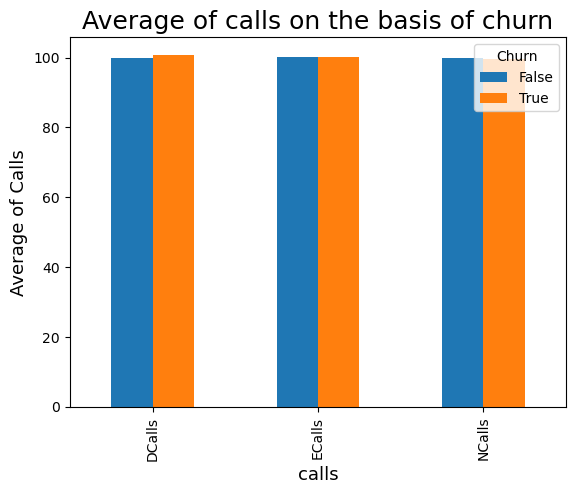

In [47]:
# Bar plot of above table
plt.figure(figsize=(9,6))
cn_calls.plot(kind='bar',ylabel='mean')
plt.title('Average of calls on the basis of churn', fontsize=18)
plt.xlabel("calls", fontsize = 13)
plt.ylabel('Average of Calls',fontsize = 13)
plt.show()

In [48]:
# Table of average minutes of total day, eve & night on basis of churn
cn_minutes = pd.merge(pd.merge(cn_dm,cn_em, on = 'Churn'),cn_nm,on = 'Churn').round(2).T
cn_minutes

Churn,False,True
DMins,176.00,207.30
EMins,198.64,211.24
NMins,199.73,206.00


<Figure size 900x600 with 0 Axes>

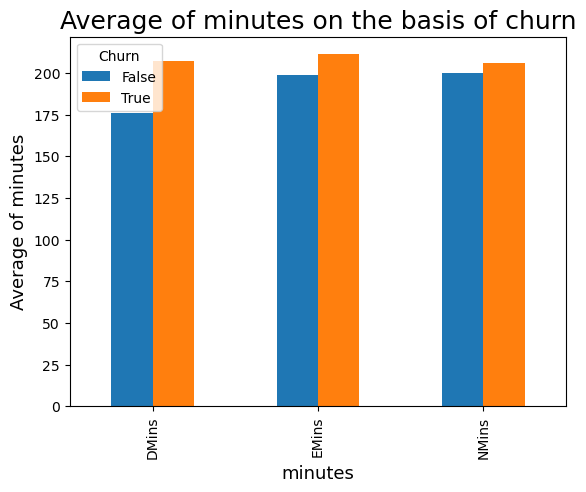

In [49]:
# Bar plot of above table
plt.figure(figsize=(9,6))
cn_minutes.plot(kind='bar',ylabel='mean')
plt.title('Average of minutes on the basis of churn', fontsize=18)
plt.xlabel("minutes", fontsize = 13)
plt.ylabel('Average of minutes',fontsize = 13)
plt.show()

In [50]:
# Table of average charges of total day, eve & night on basis of churn
cn_charges = pd.merge(pd.merge(cn_dc,cn_ec, on = 'Churn'),cn_nc,on = 'Churn').round(2).T
cn_charges

Churn,False,True
DCharge,29.92,35.24
ECharge,16.88,17.96
NCharge,8.99,9.27


<Figure size 900x700 with 0 Axes>

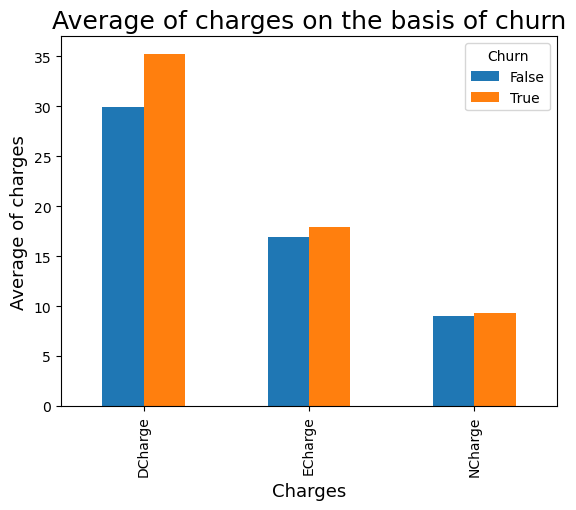

In [51]:
# Bar plot of above table
plt.figure(figsize=(9,7))
cn_charges.plot(kind='bar',ylabel='mean')
plt.title('Average of charges on the basis of churn', fontsize=18)
plt.xlabel("Charges", fontsize = 13)
plt.ylabel('Average of charges',fontsize = 13)
plt.show()

##### Insights

* Churn customers speak more minutes that non-churn customers at day,evening and night. Hence they pay more charge that non-churn customers.

We can retain churn customers if we include master plan.
In master plan if a customer is talking more minutes then we can charge a little less amount from him or he can get discount or additional few free minutes to talk.

This will make customers who are going to churn happy and they will not leave the company.

For telecom service provider calling and messaging are two essential product plans. Thus, optimizing voice call plans will definitely create a business impact. Those who are using just calling service must be provided some additional offers either in talktime or powerplus plan. Those who use voice call plan for night only, we might offer some exciting plans from midnight 12 to morning 6. For customers those who have higher accout length should be provided exciting offers as they are our loyal customers. Churing of higher account length customer will have a negative impact on business.


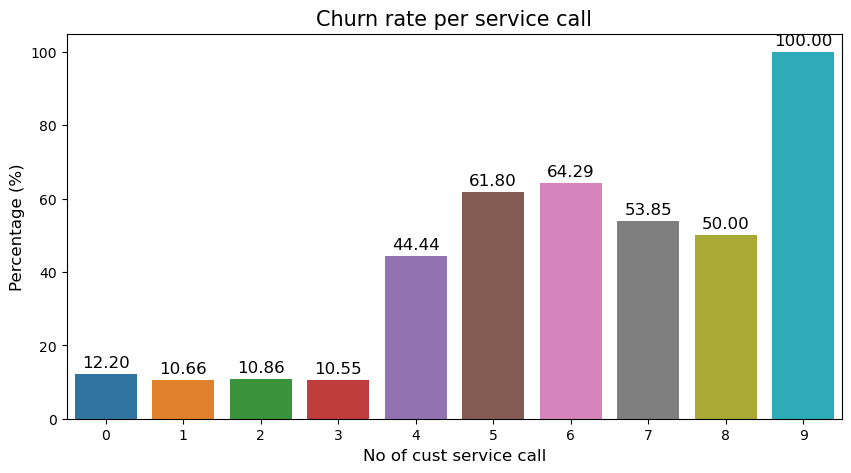

In [52]:
# Chart - 9 visualization code
# data for customer service calls
service = pd.DataFrame(data.groupby('CSCalls')['Churn'].mean()*100)

# Visualizing churn rate per customer service calls
plt.figure(figsize=(10,5))
plots = sns.barplot(x=service.index, y=service['Churn'])
for bar in plots.patches:
  plots.annotate(format(bar.get_height(),'.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.title("Churn rate per service call", fontsize = 15)
plt.xlabel('No of cust service call', fontsize = 12)
plt.ylabel('Percentage (%)', fontsize = 12)
plt.show()

##### Insights

* The service calls of customers varies from 0 to 9 .
*Those customers who make more service calls they have a high probability of leaving.
* As we can see from graph , customers with more than 5, their churning rate is more.
* Hence customers who make more than 5 service calls, their queries should be solved immediately and they should be given better service so that they dont leave the company.

***Customers with four or more customer service calls churn more than four times as often as do the other customers***

Customer service is an essential factor for every business. So definitely good customer service will have a positive impact to the business. We have to look after the customer calls and customer query report resolution duration. Need to optimize the time period. If one type of issue is coming from more than 5 customers, root cause analysis should be done on that same issue and should be resolved for everyone.
Need to reduce the calls for each customer and he should be satisfied in a single call only. The customer service agents should be given great offer or recognition over great performance of customer issue resolution.

## Data Preprocessing

In [53]:
#checking missing value
data.isnull().sum()

State         0
Ac_len        0
Ar_Code       0
IPlan         0
VMail_Plan    0
VMail_Mes     0
DMins         0
DCalls        0
DCharge       0
EMins         0
ECalls        0
ECharge       0
NMins         0
NCalls        0
NCharge       0
IMins         0
Icalls        0
ICharge       0
CSCalls       0
Churn         0
dtype: int64

* NO Missing value present

In [54]:
# checking duplicated value
data.duplicated().sum()

0

* NO Duplicates present

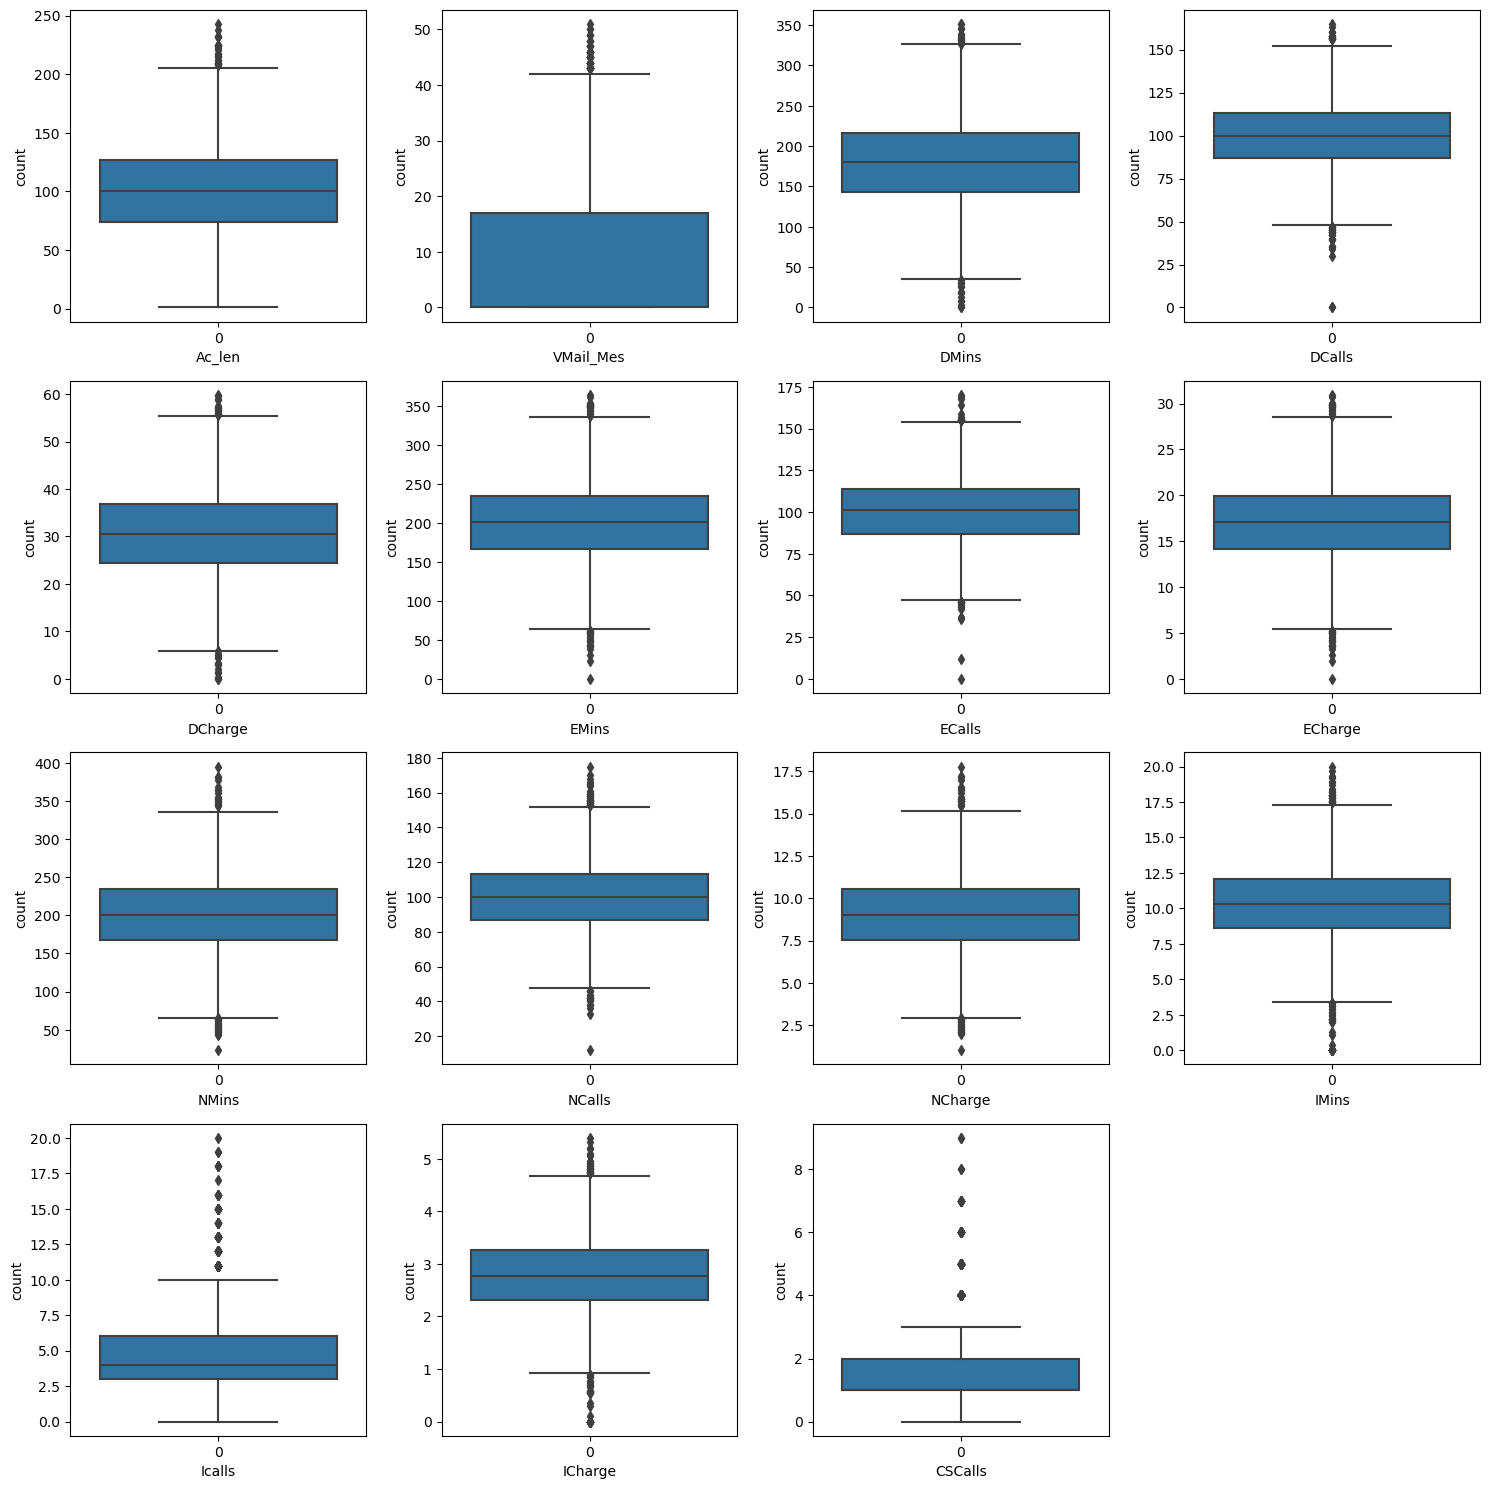

In [55]:
#checking outliers

plt.figure(figsize=(15,15),facecolor='white')
plotnumber=1
for column in num_col:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.boxplot(data=num_col[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('count')
    plotnumber+=1
plt.tight_layout()


In [56]:
#handling outliers
#for Ac_len(ND)
lower_limit=data['Ac_len'].mean()-3*data['Ac_len'].std()
upper_limit=data['Ac_len'].mean()+3*data['Ac_len'].std()
data.loc[data['Ac_len']<lower_limit,'Ac_len']=np.median(data['Ac_len'])
data.loc[data['Ac_len']>upper_limit,'Ac_len']=np.median(data['Ac_len'])

In [57]:
#for VMail_Mes
q1=data['VMail_Mes'].quantile(0.25)
q3=data['VMail_Mes'].quantile(0.75)
IQR=q3-q1
min_limit=q1-1.5*IQR
max_limit=q3+1.5*IQR
#data.loc[data['VMail_Mes']<min_limit,'VMail_Mes']=np.median(data['VMail_Mes'][0])
data.loc[data['VMail_Mes']>max_limit,'VMail_Mes']=np.median(data['VMail_Mes'][0])

In [58]:
#for DMins(ND)
lower_limit=data['DMins'].mean()-3*data['DMins'].std()
upper_limit=data['DMins'].mean()+3*data['DMins'].std()
data.loc[data['DMins']<lower_limit,'DMins']=np.median(data['DMins'])
data.loc[data['DMins']>upper_limit,'DMins']=np.median(data['DMins'])

In [59]:
#for DCalls(ND)
lower_limit=data['DCalls'].mean()-3*data['DCalls'].std()
upper_limit=data['DCalls'].mean()+3*data['DCalls'].std()
data.loc[data['DCalls']<lower_limit,'DCalls']=np.median(data['DCalls'])
data.loc[data['DCalls']>upper_limit,'DCalls']=np.median(data['DCalls'])

In [60]:
#for DCharge(ND)
lower_limit=data['DCharge'].mean()-3*data['DCharge'].std()
upper_limit=data['DCharge'].mean()+3*data['DCharge'].std()
data.loc[data['DCharge']<lower_limit,'DCharge']=np.median(data['DCharge'])
data.loc[data['DCharge']>upper_limit,'DCharge']=np.median(data['DCharge'])

In [61]:
#for EMins(ND)
lower_limit=data['EMins'].mean()-3*data['EMins'].std()
upper_limit=data['EMins'].mean()+3*data['EMins'].std()
data.loc[data['EMins']<lower_limit,'EMins']=np.median(data['EMins'])
data.loc[data['EMins']>upper_limit,'EMins']=np.median(data['EMins'])

In [62]:
#for ECalls(ND)
lower_limit=data['ECalls'].mean()-3*data['ECalls'].std()
upper_limit=data['ECalls'].mean()+3*data['ECalls'].std()
data.loc[data['ECalls']<lower_limit,'ECalls']=np.median(data['ECalls'])
data.loc[data['ECalls']>upper_limit,'ECalls']=np.median(data['ECalls'])

In [63]:
#for ECharge(ND)
lower_limit=data['ECharge'].mean()-3*data['ECharge'].std()
upper_limit=data['ECharge'].mean()+3*data['ECharge'].std()
data.loc[data['ECharge']<lower_limit,'ECharge']=np.median(data['ECharge'])
data.loc[data['ECharge']>upper_limit,'ECharge']=np.median(data['ECharge'])

In [64]:
#for NMins(ND)
lower_limit=data['NMins'].mean()-3*data['NMins'].std()
upper_limit=data['NMins'].mean()+3*data['NMins'].std()
data.loc[data['NMins']<lower_limit,'NMins']=np.median(data['NMins'])
data.loc[data['NMins']>upper_limit,'NMins']=np.median(data['NMins'])

In [65]:
#for NCalls(ND)
lower_limit=data['NCalls'].mean()-3*data['NCalls'].std()
upper_limit=data['NCalls'].mean()+3*data['NCalls'].std()
data.loc[data['NCalls']<lower_limit,'NCalls']=np.median(data['NCalls'])
data.loc[data['NCalls']>upper_limit,'NCalls']=np.median(data['NCalls'])

In [66]:
#for NCharge(ND)
lower_limit=data['NCharge'].mean()-3*data['NCharge'].std()
upper_limit=data['NCharge'].mean()+3*data['NCharge'].std()
data.loc[data['NCharge']<lower_limit,'NCharge']=np.median(data['NCharge'])
data.loc[data['NCharge']>upper_limit,'NCharge']=np.median(data['NCharge'])

In [67]:
#for IMins(ND)
lower_limit=data['IMins'].mean()-3*data['IMins'].std()
upper_limit=data['IMins'].mean()+3*data['IMins'].std()
data.loc[data['IMins']<lower_limit,'IMins']=np.median(data['IMins'])
data.loc[data['IMins']>upper_limit,'IMins']=np.median(data['IMins'])

In [68]:
#for ICalls
q1=data['Icalls'].quantile(0.25)
q3=data['Icalls'].quantile(0.75)
IQR=q3-q1
min_limit=q1=1.5*IQR
max_limit=q3+1.5*IQR
#data.loc[data['Icalls']<min_limit]=np.median(data['Icalls'])
data.loc[data['Icalls']>max_limit,'Icalls']=np.median(data['Icalls'])

In [69]:
#for ICharge(ND)
lower_limit=data['ICharge'].mean()-3*data['ICharge'].std()
upper_limit=data['ICharge'].mean()+3*data['ICharge'].std()
data.loc[data['ICharge']<lower_limit,'ICharge']=np.median(data['ICharge'])
data.loc[data['ICharge']>upper_limit,'ICharge']=np.median(data['ICharge'])

In [70]:
#for CSCalls
q1=data['CSCalls'].quantile(0.25)
q3=data['CSCalls'].quantile(0.75)
IQR=q3-q1
min_limit=q1=1.5*IQR
max_limit=q3+1.5*IQR
#data.loc[data['CSCalls']<min_limit]=np.median(data['CSCalls'])
data.loc[data['CSCalls']>max_limit,'CSCalls']=np.median(data['CSCalls'])

### Encoding

In [71]:
cat_col.columns

Index(['State', 'Ar_Code', 'IPlan', 'VMail_Plan', 'Churn'], dtype='object')

In [72]:
cat_col=pd.get_dummies(cat_col.drop(['State','Churn'],axis=1),drop_first=True)
cat_col

,Ar_Code_415,Ar_Code_510,IPlan_ yes,VMail_Plan_ yes
0,1,0,0,1
1,1,0,0,1
2,1,0,0,0
3,0,0,1,0
4,1,0,1,0
...,...,...,...,...
4612,0,1,0,1
4613,0,0,0,1
4614,0,0,0,1
4615,1,0,0,1


In [73]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
data['State']=lc.fit_transform(data['State'])

In [74]:
cat_col.loc[:, ~cat_col.columns.duplicated()]

,Ar_Code_415,Ar_Code_510,IPlan_ yes,VMail_Plan_ yes
0,1,0,0,1
1,1,0,0,1
2,1,0,0,0
3,0,0,1,0
4,1,0,1,0
...,...,...,...,...
4612,0,1,0,1
4613,0,0,0,1
4614,0,0,0,1
4615,1,0,0,1


In [75]:
data_final=pd.concat([data,cat_col],axis=1)

In [76]:
data_final.drop(['IPlan', 'VMail_Plan','Ar_Code'],axis=1,inplace=True)

In [77]:
data_final.shape

(4617, 21)

In [78]:
data_final.head()

,State,Ac_len,VMail_Mes,DMins,DCalls,DCharge,EMins,ECalls,ECharge,NMins,...,NCharge,IMins,Icalls,ICharge,CSCalls,Churn,Ar_Code_415,Ar_Code_510,IPlan_ yes,VMail_Plan_ yes
0,16,128,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,False,1,0,0,1
1,35,107,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,False,1,0,0,1
2,31,137,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,False,1,0,0,0
3,35,84,0,299.4,71,50.90,61.9,88,5.26,196.9,...,8.86,6.6,7,1.78,2,False,0,0,1,0
4,36,75,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,False,1,0,1,0


## Feature Selection

<Axes: >

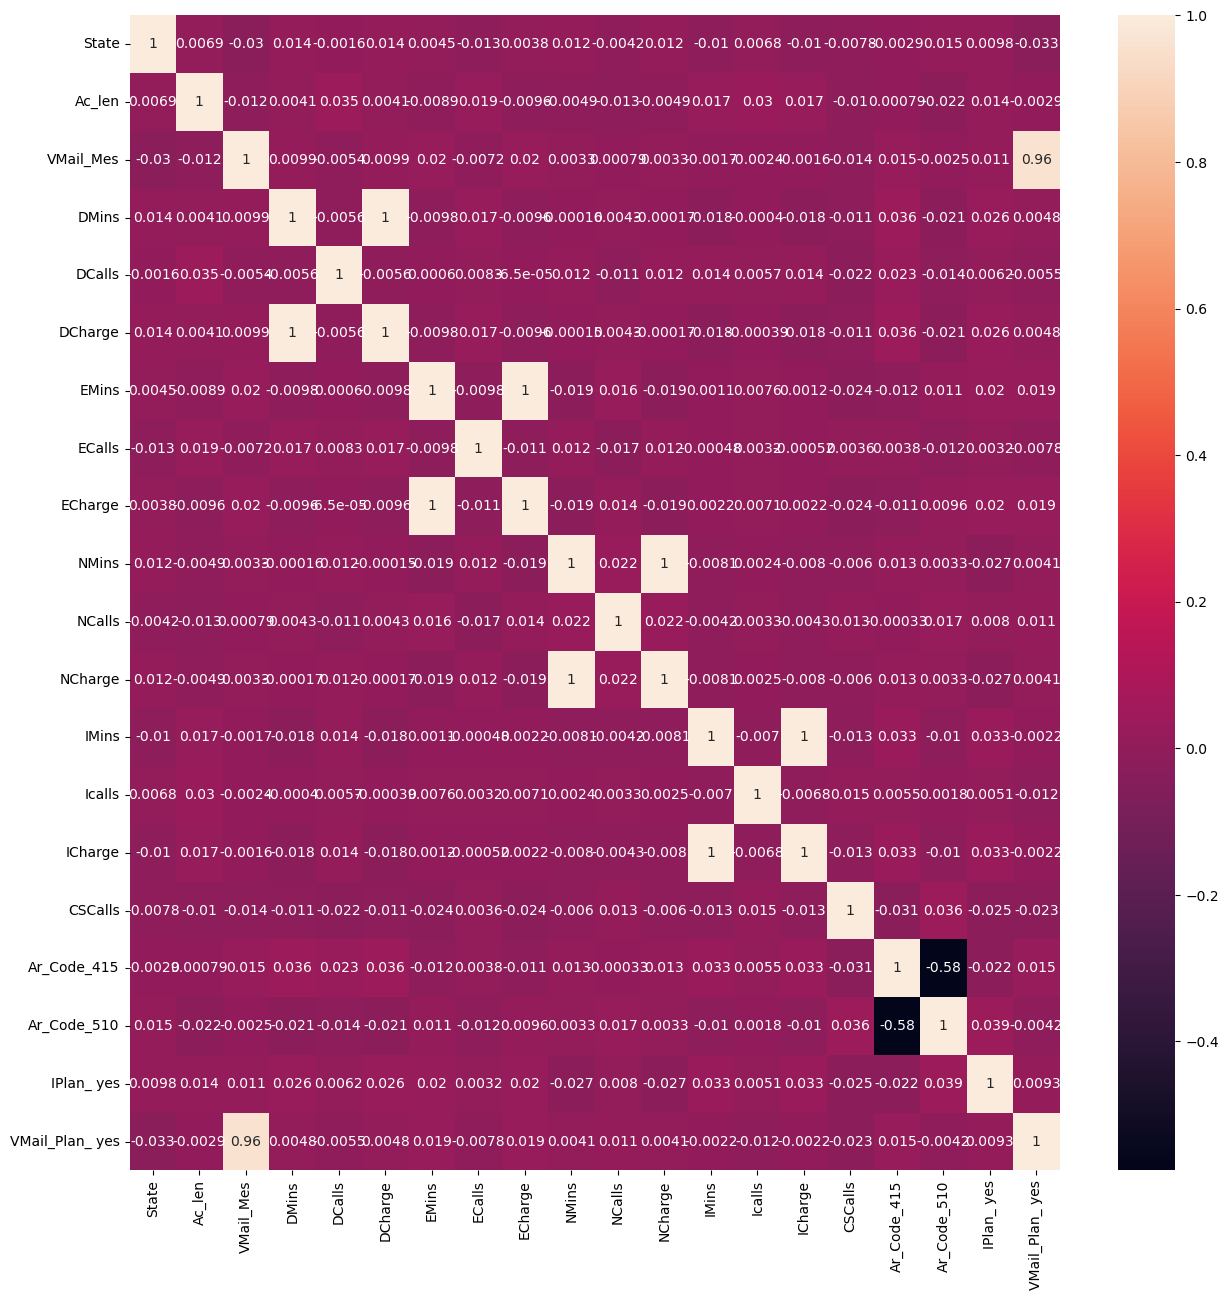

In [79]:
plt.figure(figsize=(15,15))
sns.heatmap(data_final.drop(['Churn'],axis=1).corr(),annot=True)

* We can drop DMins,EMins,NMins,IMins,VMail_Plan_yes due to high correlation with other variables

In [80]:
data_final.drop(['DMins','EMins','NMins','IMins','VMail_Plan_ yes'],axis=1,inplace=True)

### Data splitting

In [81]:
X = data_final.drop(['Churn'], axis=1)
y = data_final['Churn']

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)


In [83]:
from  sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [84]:
#smote
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X_train, y_train)

In [85]:
y_smote.value_counts()

False    3169
True     3169
Name: Churn, dtype: int64

## Moodel creation

### 1. Logistic Reg 

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score
lr = LogisticRegression()

In [88]:
lr.fit(X_smote, y_smote)

LogisticRegression()

In [89]:
ypred = lr.predict(X_test)

In [90]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       False       0.92      0.71      0.80       792
        True       0.27      0.64      0.38       132

    accuracy                           0.70       924
   macro avg       0.59      0.67      0.59       924
weighted avg       0.83      0.70      0.74       924



### 2. Support Vector Machine

In [91]:
from sklearn.svm import SVC
svm = SVC()

In [92]:
svm.fit(X_smote, y_smote)

SVC()

In [93]:
ypred = svm.predict(X_test)

In [94]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

       False       0.91      0.90      0.91       792
        True       0.45      0.48      0.46       132

    accuracy                           0.84       924
   macro avg       0.68      0.69      0.69       924
weighted avg       0.85      0.84      0.84       924



#### Hyperparameter tuning

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
params_grid = {'C':[0.1,1,5,10],
              'gamma':[0.01,0.001,0.0001],
               'random_state':(list(range(1, 20)))
              }

In [97]:
model = SVC()
grid = GridSearchCV(model, params_grid, refit =True, verbose = 2,
                   scoring = 'f1', cv=3)

In [98]:
grid.fit(X_smote,y_smote)

Fitting 3 folds for each of 228 candidates, totalling 684 fits
[CV] END ..................C=0.1, gamma=0.01, random_state=1; total time=   1.2s
[CV] END ..................C=0.1, gamma=0.01, random_state=1; total time=   1.2s
[CV] END ..................C=0.1, gamma=0.01, random_state=1; total time=   1.4s
[CV] END ..................C=0.1, gamma=0.01, random_state=2; total time=   1.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=2; total time=   1.4s
[CV] END ..................C=0.1, gamma=0.01, random_state=2; total time=   1.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   1.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   1.2s
[CV] END ..................C=0.1, gamma=0.01, random_state=3; total time=   1.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   1.1s
[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   1.1s
[CV] END ..................C=0.1, gamma=0.01, 

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10], 'gamma': [0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [99]:
grid.best_params_

{'C': 10, 'gamma': 0.01, 'random_state': 1}

In [100]:
re_model =SVC(C = 10, gamma = 0.01, random_state=1)
re_model.fit(X_smote, y_smote)

SVC(C=10, gamma=0.01, random_state=1)

In [101]:
ypred = re_model.predict(X_test)

In [102]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

       False       0.92      0.89      0.90       792
        True       0.43      0.52      0.47       132

    accuracy                           0.83       924
   macro avg       0.67      0.70      0.69       924
weighted avg       0.85      0.83      0.84       924



### 3. Decision tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [104]:
dt.fit(X_smote, y_smote)

DecisionTreeClassifier()

In [105]:
ypred = dt.predict(X_test)

In [106]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

       False       0.92      0.89      0.90       792
        True       0.43      0.52      0.47       132

    accuracy                           0.83       924
   macro avg       0.67      0.70      0.68       924
weighted avg       0.85      0.83      0.84       924



#### hyperparameter tuning

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
params_grid = {'criterion':['gini','entropy'],
              'splitter':['best','random'],
              'max_depth':(list(range(1,10))),
              'min_samples_split':[2,3,4,5],
              'min_samples_leaf':(list(range(1,10)))}

In [109]:
d_tree_cv = GridSearchCV(dt, params_grid, refit = True, verbose =2, 
                         scoring='f1', cv= 3, n_jobs = -1)

In [110]:
d_tree_cv.fit(X_smote, y_smote)

Fitting 3 folds for each of 1296 candidates, totalling 3888 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=2)

In [111]:
d_tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'splitter': 'best'}

In [112]:
hyp_dt = DecisionTreeClassifier( criterion = 'entropy',
                               max_depth=9,
                               min_samples_leaf=5,
                               min_samples_split =3,
                               splitter = 'best', random_state=42)
hyp_dt.fit(X_smote, y_smote)
y_new_pred = hyp_dt.predict(X_test)
print(classification_report(y_test,y_new_pred))

              precision    recall  f1-score   support

       False       0.93      0.89      0.91       792
        True       0.46      0.57      0.51       132

    accuracy                           0.84       924
   macro avg       0.69      0.73      0.71       924
weighted avg       0.86      0.84      0.85       924



### 4. random forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
churn_rf = RandomForestClassifier(n_estimators = 100)

In [115]:
churn_rf.fit(X_smote, y_smote)

RandomForestClassifier()

In [116]:
churn_rf_pred = churn_rf.predict(X_test)

In [117]:
print(classification_report(y_test, churn_rf_pred))

              precision    recall  f1-score   support

       False       0.92      0.97      0.95       792
        True       0.76      0.52      0.62       132

    accuracy                           0.91       924
   macro avg       0.84      0.75      0.78       924
weighted avg       0.90      0.91      0.90       924



In [118]:
params_grid = {'n_estimators': [50, 100, 200],
              'max_features': ['sqrt', 'log2'],
              'max_depth': [10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

In [119]:
random_tree_cv = GridSearchCV(churn_rf, params_grid, refit = True, verbose =2, 
                         scoring='f1', cv= 3, n_jobs = -1)

In [120]:
random_tree_cv.fit(X_smote, y_smote)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [121]:
random_tree_cv.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [122]:
hyp_rf = RandomForestClassifier(bootstrap=False,
                                 max_depth= 20, 
                                 max_features='sqrt',
                                 min_samples_leaf=1,
                                 min_samples_split= 2,
                                 n_estimators=200)
hyp_rf.fit(X_smote, y_smote)
y_new_pred = hyp_rf.predict(X_test)
print(classification_report(y_test,y_new_pred))

              precision    recall  f1-score   support

       False       0.92      0.97      0.94       792
        True       0.73      0.47      0.57       132

    accuracy                           0.90       924
   macro avg       0.82      0.72      0.76       924
weighted avg       0.89      0.90      0.89       924



In [125]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores_after = cross_val_score(hyp_rf,X_smote,y_smote,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores_after.std())
#std of < 0.05 is good.

[0.93359567 0.97798595 0.97961119]
Cross validation Score: 0.9637309366789341
Std : 0.021319177778283276


### 5. ANN

In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [127]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [128]:
model.fit(X_smote, y_smote, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50


199/199 [==============================] - 3s 4ms/step - loss: 0.5676 - accuracy: 0.7176 - val_loss: 0.5382 - val_accuracy: 0.7316
Epoch 2/50
199/199 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.7807 - val_loss: 0.4690 - val_accuracy: 0.8052
Epoch 3/50
199/199 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8133 - val_loss: 0.4726 - val_accuracy: 0.7825
Epoch 4/50
199/199 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8367 - val_loss: 0.4209 - val_accuracy: 0.8236
Epoch 5/50
199/199 [==============================] - 0s 2ms/step - loss: 0.3438 - accuracy: 0.8509 - val_loss: 0.4260 - val_accuracy: 0.8139
Epoch 6/50
199/199 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.8599 - val_loss: 0.4034 - val_accuracy: 0.8366
Epoch 7/50
199/199 [==============================] - 1s 3ms/step - loss: 0.3011 - accuracy: 0.8738 - val_loss: 0.4030 - val_accuracy: 0.8258
Epoc

In [129]:
# Evaluate the model
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


29/29 [==============================] - 0s 3ms/step
Accuracy: 0.8538961038961039
Confusion Matrix:
[[725  67]
 [ 68  64]]
Classification Report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.91       792
        True       0.49      0.48      0.49       132

    accuracy                           0.85       924
   macro avg       0.70      0.70      0.70       924
weighted avg       0.85      0.85      0.85       924



### Model Comparision

In [130]:
import pandas as pd

# Define the performance metrics for each model
Log_Reg_score = {'precision': 0.83, 'recall': 0.70, 'accuracy': 0.74}
SVM_score = {'precision': 0.85, 'recall': 0.84, 'accuracy': 0.84}
SVM_hyper_score = {'precision': 0.85, 'recall': 0.83, 'accuracy': 0.84}
Dct_score= {'precision': 0.85, 'recall': 0.83, 'accuracy': 0.84}
Dct_hyper_score= {'precision': 0.86, 'recall': 0.84, 'accuracy': 0.85}
RF_score= {'precision': 0.90, 'recall': 0.91, 'accuracy': 0.90}
RF_hyper_score = {'precision': 0.89, 'recall': 0.90, 'accuracy': 0.89}
ANN_score = {'precision': 0.85, 'recall': 0.85,'accuracy': 0.85}

# Create a list of dictionaries containing the performance metrics for each model
model_scores = [Log_Reg_score,SVM_score,SVM_hyper_score,Dct_score,Dct_hyper_score,RF_score,RF_hyper_score,ANN_score]

# Create a dataframe from the list of dictionaries
df = pd.DataFrame(model_scores, index=['Log_Reg','SVM','SVM_hyper','Dct_score','Dct_hyper','RF','RF_hyper','ANN'])

# Print the dataframe
print(df)


           precision  recall  accuracy
Log_Reg         0.83    0.70      0.74
SVM             0.85    0.84      0.84
SVM_hyper       0.85    0.83      0.84
Dct_score       0.85    0.83      0.84
Dct_hyper       0.86    0.84      0.85
RF              0.90    0.91      0.90
RF_hyper        0.89    0.90      0.89
ANN             0.85    0.85      0.85


By comparing above models, its clear that Random Forest is the best model

## **5. Solution to Business Objective**

**Solution to Reduce Customer Churn**

* Modify International Plan as the charge is same as normal one.
* Be proactive with communication.
* Ask for feedback often.
* Periodically throw Offers to retain customers.
* Look at the customers facing problem in  the most churning states.
* Lean into  best customers.
* Regular Server Maintenance.
* Solving Poor Network Connectivity Issue.
* Define a roadmap for new customers.
* Analyze churn when it happens.
* Stay competitive.

# **Conclusion**

The telecommunications market is already well-established, and the rate of new customers is slow. As a result, companies in this industry prioritize retention and reducing customer churn. This project analyzed a churn dataset to identify the main factors contributing to churn and gain valuable insights. Through exploratory data analysis, we were able to gain insight into the churn dataset, listed below:



1. The four charge fields are directly related to the minute fields.

2. The area code may not be relevant and can be excluded.

3. Customers with the International Plan tend to churn more often.

4. Customers who have had four or more customer service calls churn significantly more than other customers.

5. Customers with high day and evening minute usage tend to churn at a higher rate.

6. There is no clear relationship between churn and the variables such as day calls, evening calls, night calls, international calls, night minutes, international minutes, account length, or voice mail messages.

